<a href="https://colab.research.google.com/github/Gugo-le/103-zoom/blob/main/physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pydub

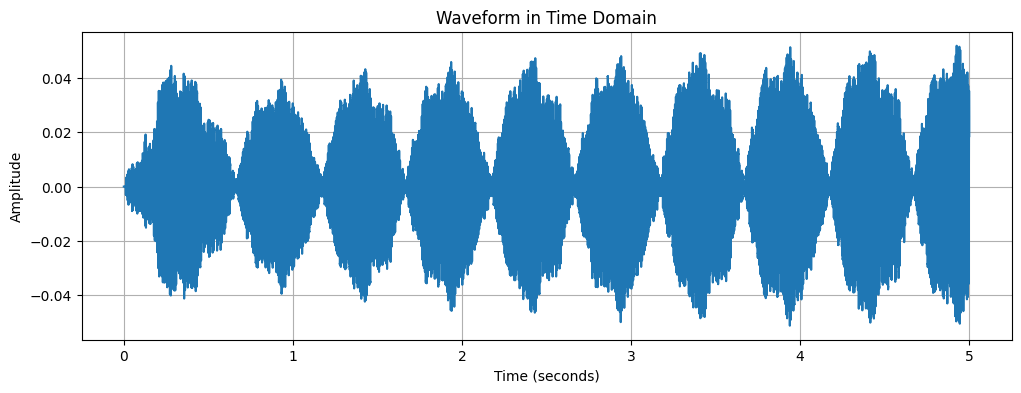

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import soundfile as sf
import io

# 소리 파일 읽기
audio_path = '/content/sound/delta.m4a'
audio = AudioSegment.from_file(audio_path, format="m4a")

# 5초까지의 데이터만 사용
audio = audio[:5000]

# m4a 파일을 WAV로 변환
wav_data = io.BytesIO()
audio.export(wav_data, format="wav")
wav_data.seek(0)

# WAV 파일 읽기
audio_data, sample_rate = sf.read(wav_data)

# 시간 도메인에서의 파형 시각화
time = np.arange(0, len(audio_data)) / sample_rate
plt.figure(figsize=(12, 4))
plt.plot(time, audio_data)
plt.title('Waveform in Time Domain')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# FFT 적용
fft_result = np.fft.fft(audio_data)
freqs = np.fft.fftfreq(len(fft_result), 1/sample_rate)
